In [1]:
### TASK 1

In [2]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Read the CSV

# Set the file paths
food_claims_data = Path('./food_claims_2212.csv')

# Read the CSV file
food_claims_df = pd.read_csv(food_claims_data)

#Display a few rows
food_claims_df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


In [4]:
## Analyze each column in DataFrame

# Count the number of rows in claim_id column
num_rows = len(food_claims_df)

# Print the result
print(num_rows)

2000


In [5]:
# Define time_to_close column  
time_to_close = 'time_to_close'

# Find any negative values
if (food_claims_df[time_to_close] < 0).any():
    print(f"There are negative values in '{time_to_close}' column.")
else:
    print(f"There are no negative values in '{time_to_close}' column.")

There are no negative values in 'time_to_close' column.


In [6]:
# Find any missing values in the time_to_close column 
missing_values_ttc = food_claims_df['time_to_close'].isna().sum()

# Print the result
print(missing_values_ttc)

0


In [7]:
# Define the claim_amount column
claim_amount = 'claim_amount'

# Remove the first three characters from all values in the specified column
food_claims_df[claim_amount] = food_claims_df[claim_amount].str[3:]

# Convert the values in the specified column to float
food_claims_df[claim_amount] = food_claims_df[claim_amount].astype(float)

# Define a function to check if a value is rounded to more than 2 decimal places
def is_rounded_to_more_than_2_decimals(value):
    return value != round(value, 2)

# Apply the function to the specified column and create a boolean mask
rounded_values_mask = food_claims_df[claim_amount].apply(is_rounded_to_more_than_2_decimals)

# Get the rows where the values are rounded to more than 2 decimal places
rounded_values = rounded_values_mask.sum()

# Print the result
print(rounded_values)

0


In [8]:
# Find any missing values in the claim_amount column 
missing_values_ca = food_claims_df['claim_amount'].isna().sum()

# Print the result
print(missing_values_ca)

0


In [9]:
# Define the amount_paid column
amount_paid = 'amount_paid'

# Define a function to check if a value is rounded to more than 2 decimal places
def is_rounded_to_more_than_2_decimals_ap(value):
    return value != round(value, 2)

# Apply the function to the specified column and create a boolean mask
rounded_values_mask_ap = food_claims_df[amount_paid].apply(is_rounded_to_more_than_2_decimals_ap)

# Get the rows where the values are rounded to more than 2 decimal places
rounded_values_ap = rounded_values_mask_ap.sum()

# Print the result
print(rounded_values_ap)

36


In [10]:
# Find any missing values in the amount_paid column 
missing_values_ap = food_claims_df['amount_paid'].isna().sum()

# Print the result
print(missing_values_ap)

36


In [11]:
## Replace all the missing values with median on amount_paid column
# Calculate the median of the column (excluding NaN values)
median_value = food_claims_df['amount_paid'].median()

# Replace NaN values with the calculated median value
food_claims_df['amount_paid'].fillna(median_value, inplace=True)

# Display a few rows
food_claims_df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,24447.20,23986.30,SAO LUIS,10,True,meat
3,4,186,29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,19520.60,16251.06,RECIFE,11,False,vegetable


In [12]:
# Display all unique values in the location column
unique_location = food_claims_df['location'].unique()

# Print the result
print(unique_location)

['RECIFE' 'FORTALEZA' 'SAO LUIS' 'NATAL']


In [13]:
# Find any missing values in the location column 
missing_values_l = food_claims_df['location'].isna().sum()

# Print the result
print(missing_values_l)

0


In [14]:
# Display all unique values in the individuals_on_claim column
unique_individuals = food_claims_df['individuals_on_claim'].unique()

# Print the result
print(unique_individuals)

[15 12 10 11  8  9  6  7 13  4  2  3 14  5  1]


In [15]:
# Find any missing values in the individuals_on_claim column 
missing_values_ioc = food_claims_df['individuals_on_claim'].isna().sum()

# Print the result
print(missing_values_ioc)

0


In [16]:
# Display all unique values in the linked_cases column
unique_linked_cases = food_claims_df['linked_cases'].unique()

# Print the result
print(unique_linked_cases)

[False True nan]


In [17]:
# Find any missing values in the linked_cases column 
missing_values_lc = food_claims_df['linked_cases'].isna().sum()

# Print the result
print(missing_values_lc)

26


In [18]:
## Replace all the missing values with False on linked_cases column
food_claims_df['linked_cases'].fillna(False, inplace=True)

# Display DataFrame
food_claims_df

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,24447.20,23986.30,SAO LUIS,10,True,meat
3,4,186,29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,19520.60,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,28982.30,24265.02,RECIFE,10,False,meat
1996,1997,166,5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,23516.28,23310.24,RECIFE,9,False,meat


In [19]:
# Display all unique values in the cause column
unique_cause = food_claims_df['cause'].unique()

# Print the result
print(unique_cause)

['unknown' 'meat' 'vegetable' ' Meat' 'VEGETABLES']


In [20]:
## Manipulate all strings in cause column to match 'vegetable', 'meat', or 'unknown'
# Trim any whitespaces and lowercase all strings
food_claims_df['cause'] = food_claims_df['cause'].str.strip().str.lower()

# Make all 'vegetable' objects singular
food_claims_df['cause'] = food_claims_df['cause'].str.replace(r'vegetables$', 'vegetable', regex=True)

# Print the result
print(food_claims_df['cause'].unique())

['unknown' 'meat' 'vegetable']


In [21]:
# Confirm the number of rows are the same and no nulls before further analysis
print(len(food_claims_df), 'rows')
print(food_claims_df.isna().sum())

2000 rows
claim_id                0
time_to_close           0
claim_amount            0
amount_paid             0
location                0
individuals_on_claim    0
linked_cases            0
cause                   0
dtype: int64


In [22]:
### TASK 2

# Group the DataFrame by 'location'
food_claims_grouped = food_claims_df.groupby('location')

# Compute count for each 'location'
food_claims_count = food_claims_grouped['claim_id'].count()

# Print the count result
print(food_claims_count)

location
FORTALEZA    311
NATAL        287
RECIFE       885
SAO LUIS     517
Name: claim_id, dtype: int64


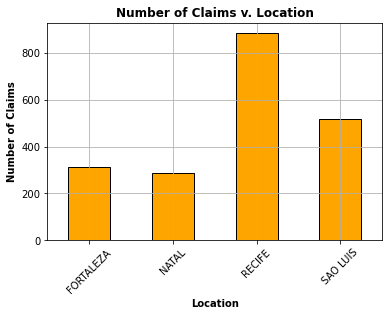

In [31]:
# Create bar graph comparing number of claims per location
food_claims_count.plot(kind='bar', x='location', color='orange', edgecolor='black', legend=False)

# Add title, labels and gridline
plt.title('Number of Claims v. Location', fontweight='bold')
plt.xlabel('Location', fontweight='bold')
plt.ylabel('Number of Claims', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('claims_vs_locations.png')

# Show the plot
plt.show()

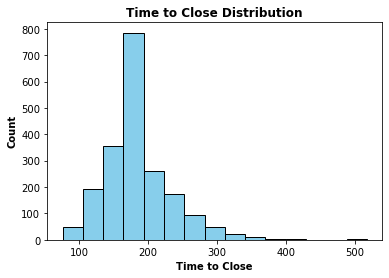

In [32]:
### TASK 3

# Create a histogram to show distribution on 'time_to_close'
plt.hist(food_claims_df['time_to_close'], bins=15, color='skyblue', edgecolor='black')

# Add labels and a title
plt.xlabel('Time to Close', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Time to Close Distribution', fontweight='bold')

# Save the plot as a PNG file
plt.savefig('time_to_close_distribution.png')

# Show the plot
plt.show()

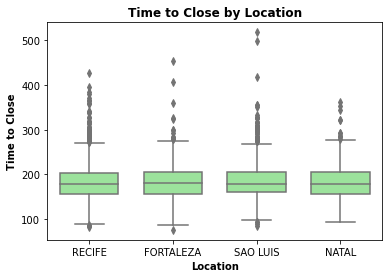

In [37]:
#### TASK 4

# Create a box plot using Seaborn, grouping by the 'Group' column
sns.boxplot(data=food_claims_df, x='location', y='time_to_close', color='lightgreen', width=0.7)

# Add labels and a title
plt.xlabel('Location', fontweight='bold')
plt.ylabel('Time to Close', fontweight='bold')
plt.title('Time to Close by Location', fontweight='bold')

# Save the plot as a PNG file
plt.savefig('time_vs_location.png')

# Show the plot
plt.show()

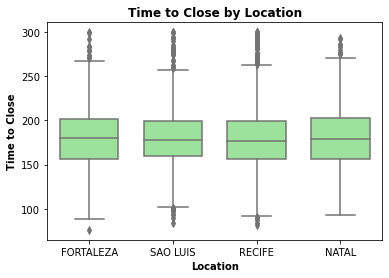

In [43]:
# Define the range of values you want to filter
lower_bound = 70
upper_bound = 300

# Filter the DataFrame to include only rows with 150 - 200 days time to close
filtered_df = food_claims_df[(food_claims_df['time_to_close'] >= lower_bound) & (food_claims_df['time_to_close'] <= upper_bound)]

# Create a box plot using Seaborn, grouping by the 'Group' column
sns.boxplot(data=filtered_df, x='location', y='time_to_close', color='lightgreen', width=0.7)

# Add labels and a title
plt.xlabel('Location', fontweight='bold')
plt.ylabel('Time to Close', fontweight='bold')
plt.title('Time to Close by Location', fontweight='bold')

# Save the plot as a PNG file
plt.savefig('time_vs_location_modified.png')

# Show the plot
plt.show()